# Synthetic notebook
This notebook documents the usage of the synthetic data generation functions in neuroginius

In [1]:
import sys
sys.path.append("..") # Add neuroginius to PYTHONPATH

In [2]:
import pandas as pd
from pathlib import Path
import numpy.linalg as npl
import matplotlib.pyplot as plt
from nilearn import plotting
import numpy as np


from neuroginius.synthetic_data.generation import generate_topology, generate_correlations, generate_topology_net_interaction

from neuroginius.atlas import Atlas
from neuroginius.iterables import unique

ATLAS = "schaefer200"

atlas = Atlas.from_name(ATLAS)
labels = tuple(sorted(unique(atlas.macro_labels)))

The topology matrix is a mask specifying the edges which should be correlated

In [3]:

# Specify intra network correlation
topology = generate_topology("Default", atlas.macro_labels)
topology += generate_topology("SomMot", atlas.macro_labels)

# Specify inter network correlation
topology += generate_topology_net_interaction(
    ("SomMot", "Vis"), atlas.macro_labels
)

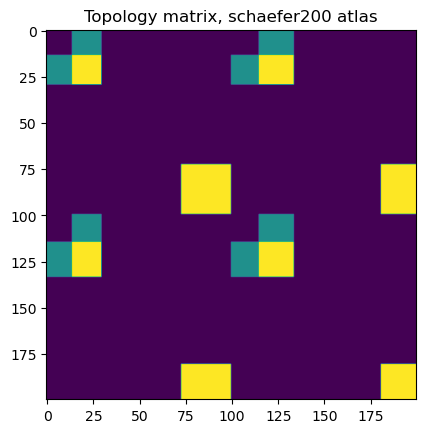

In [4]:
plt.imshow(topology)
plt.title(f"Topology matrix, {atlas.name} atlas")
plt.show()

Let's generate a hundred correlation matrices from our topology, drawing from N(0.7, 0.1)

In edges outside the topology, noise is generated following N(0, np.sqrt(loc**2/snr))

Debug display shows the source distribution and the realised covariances and correlations
inside the masks

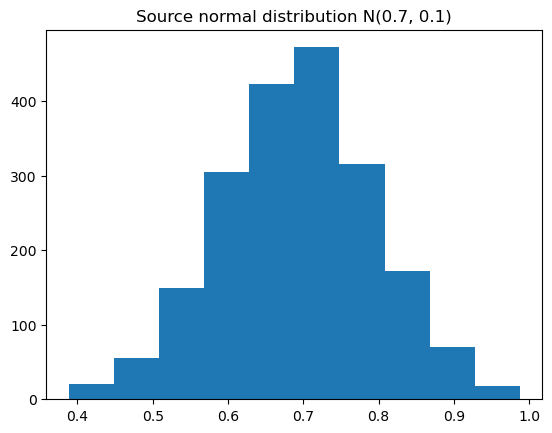

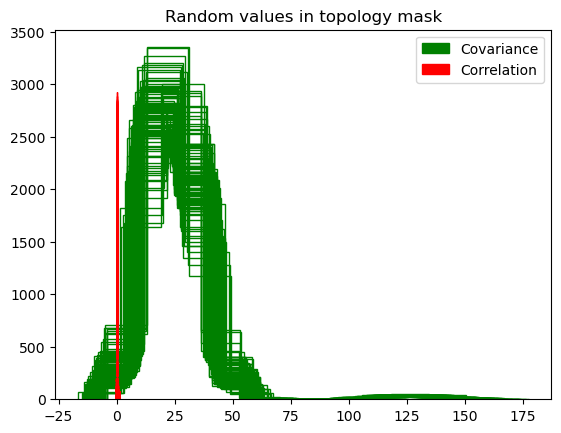

In [5]:
control_cov = np.stack(generate_correlations(100, topology, 0.7, 0.1, snr=1., debug_display=True))

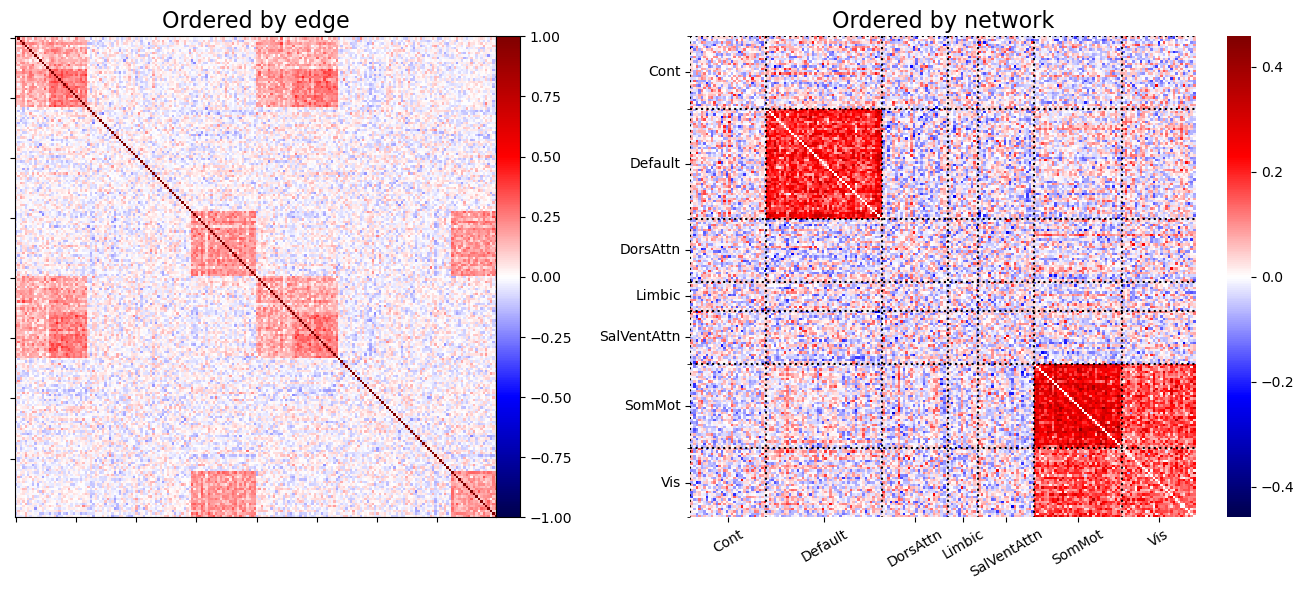

In [6]:
from neuroginius.plotting import plot_matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_matrix(control_cov[1], atlas, axes=axes[1])
axes[1].set_title("Ordered by network", size=16)
plotting.plot_matrix(
    control_cov[0], axes=axes[0], title="Ordered by edge", vmin=-1, cmap="seismic"
)
plt.show()